In [2]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torch.autograd import Variable
import torchvision
import os
import random
from IPython.display import Markdown, display, Latex

c:\Users\Harm\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Harm\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\detection\anchor_utils.py:63: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:77.)
  device: torch.device = torch.device("cpu"),


In [3]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import matplotlib.pyplot as plt # data visualization library
import sklearn
from sklearn.datasets import fetch_olivetti_faces

# Exercise : Convolution Neural Network

In [ ]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [ ]:
# Download data and define the transformer (data normalization)
# Do not change this function
def load_data(seed_value=42):
    MNIST_normalize = transforms.Normalize((0.1307,), (0.3081,))
    MNIST_transform = transforms.Compose([
      transforms.ToTensor(),
      MNIST_normalize
    ])

    # MNIST Dataset
    train = datasets.MNIST(root='./data/',
                                train=True,
                                transform=MNIST_transform,
                                download=True)

    test = datasets.MNIST(root='./data/',
                                train=False,
                                transform=MNIST_transform)

    #print(valid.dataset.data.shape)
    train_subset_size = 5000
    train.data = train.data[0:train_subset_size]
    train.targets = train.targets[0:train_subset_size]

    train_size = int(0.9 * train_subset_size)
    val_size =  int(0.1 * train_subset_size)
    print("train_set_size:", train_size)
    print("val_set_size:", val_size)

    train, valid = random_split(train, [train_size, val_size], generator=torch.Generator().manual_seed(seed_value))

    return train, valid, test

In [ ]:
# Function to show data
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
# Data Loader 
def get_data_loaders(dataset, batch_size, shuffle=True):
    loader = torch.utils.data.DataLoader(dataset=dataset,
                                            batch_size=batch_size,
                                            shuffle=shuffle)
    return loader

In [ ]:
# Model
class Conv_Net(nn.Module):
    def __init__(self, dropout_value=0.5):
        super(Conv_Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, kernel_size=3)
        self.conv2 = nn.Conv2d(128, 256, kernel_size=3)
        self.mp = nn.MaxPool2d(2)
        self.drop = nn.Dropout(dropout_value)
        self.fc = nn.Linear(6400, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.drop(x)
        x = self.fc(x)
        return F.log_softmax(x)

In [ ]:
# Run one training epoch
def train(epoch, train_loader, device):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data).to(device), Variable(target).to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data))


In [ ]:
# Compute metrics
def test(test_loader, device, is_train_set=True):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = Variable(data).to(device), Variable(target).to(device)
            output = model(data)
            # sum up batch loss
            test_loss += F.nll_loss(output, target, size_average=False).data
            # get the index of the max log-probability
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\n{}: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        'Train evaluation' if is_train_set else 'Val/Test evaluation', test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
# Use the default seed
seed_everything(seed=42)

# Training settings
batch_size = 128
lr = 0.1
momentum = 0.9 
l2 = 0.0
dropout_value = 0.0
num_epochs = 15

# Select the device
# device = 'cuda'
device = 'cpu'

# Define the network
model = Conv_Net(dropout_value).to(device)

# Define the optimizer 
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay= l2)

train_dataset, val_dataset, test_dataset = load_data()

# Divide the available data into training and validation datasets
train_loader = get_data_loaders(train_dataset, batch_size, shuffle=True)
val_loader = get_data_loaders(val_dataset, batch_size, shuffle=False)
test_loader = get_data_loaders(test_dataset, batch_size, shuffle=False)

# Run the training epochs
for epoch in range(1, num_epochs):
    train(epoch, train_loader, device)
    test(train_loader, device, is_train_set=True)
    test(val_loader, device, is_train_set=False)

# Compute the metrics using the testing dataset
test(test_loader, device, is_train_set=False)

# Exercise : MF Faces

In [3]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

Definition of the data matrix:

In [4]:
D = faces.data

The observations/rows pf the data matrix can be visualized as pictures. 10 consecutive pictures are taken from one person. This are the first 30 pictutres.

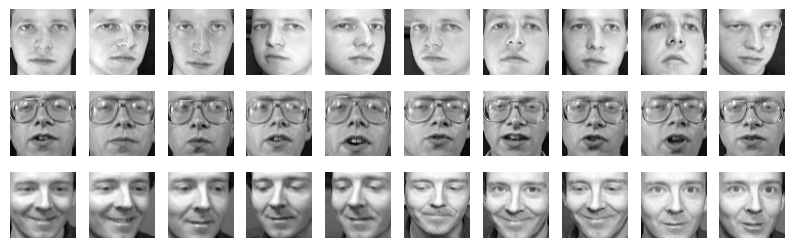

In [5]:
# Here are the first ten guys of the dataset
fig = plt.figure(figsize=(10, 3))
for i in range(30):
    ax = plt.subplot2grid((3, 10), (int(i/10), i-int(i/10)*10))
    
    ax.imshow(D[i,:].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [6]:
from sklearn.decomposition import TruncatedSVD

# implement PCA from scratch
def pca(D, r):
    
    # center the data
    C = D - np.mean(D, axis=0)
    
    # compute truncated SVD using sklearn function
    svd = TruncatedSVD(n_components=r)
    
    # fit the model
    svd.fit_transform(C)
    
    # compute the principal components
    U = svd.components_
    
    # compute low-dimensional representation
    Y = np.dot(C, U.T)
    
    # compute the reconstruction
    R = np.dot(Y, U) + np.mean(D, axis=0)
    
    return U, Y, R


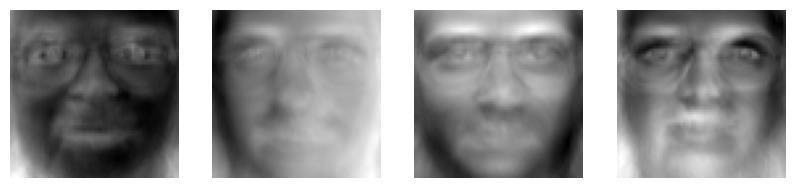

In [7]:
# A
U, Y, R = pca(D, 10)

fig = plt.figure(figsize=(10, 3))
for i in range(4):
    ax = plt.subplot2grid((1, 4), (0, i))
    ax.imshow(U[i,:].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [8]:
# B
U, Y, R = pca(D, 5)
print(Y[0])

[-6.43261    -0.70367247 -1.4299927   1.2784811   2.564763  ]


(-0.5, 63.5, 63.5, -0.5)

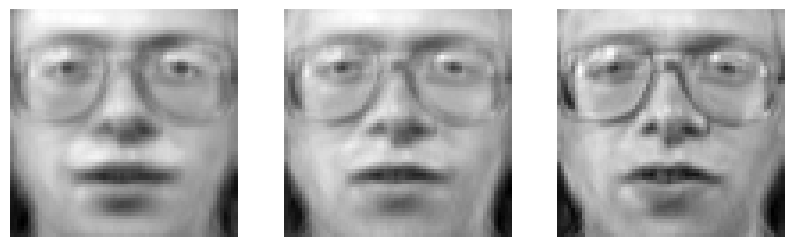

In [9]:
# C
fig = plt.figure(figsize=(10, 3))

U, Y, R = pca(D, 25)
ax = plt.subplot2grid((1, 3), (0, 0))
ax.imshow(R[19, :].reshape(64, 64), cmap=plt.cm.gray)
ax.axis('off')

U, Y, R = pca(D, 50)
ax = plt.subplot2grid((1, 3), (0, 1))
ax.imshow(R[19, :].reshape(64, 64), cmap=plt.cm.gray)
ax.axis('off')

U, Y, R = pca(D, 100)
ax = plt.subplot2grid((1, 3), (0, 2))
ax.imshow(R[19, :].reshape(64, 64), cmap=plt.cm.gray)
ax.axis('off')

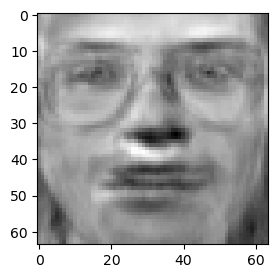

In [10]:
# D

C = D - np.mean(D, axis=0)
svd = TruncatedSVD(n_components=50)
svd.fit_transform(C)
U = svd.components_
Y = -np.ones(50)
R = np.dot(Y, U) + np.mean(D, axis=0)

fig = plt.figure(figsize=(10, 3))
ax = plt.imshow(R.reshape(64, 64), cmap=plt.cm.gray)


# Exercise: k-means Initialization

In [ ]:
!pip3 show scikit-learn

In [ ]:
!pip3 show numpy

If your versions don't match, the following commands (or their anaconda version) could help to get the newest stable release. If you need help with this, please ask the TAs during instruction hours.

In [ ]:
!pip3 install scikit-learn --upgrade
!pip3 install numpy --upgrade

The functions generating the datasets are given here:

In [ ]:
def generateMoons(epsilon, n):
    moons, labels = sklearn.datasets.make_moons(n_samples=n, noise=epsilon, random_state=7)
    return "moons", moons, labels, 2
def generateBlobs(epsilon, n):
    blobs, labels = sklearn.datasets.make_blobs(n_samples=n,centers=3, cluster_std=[epsilon + 1, epsilon + 2.5, epsilon + 0.5])
    return "blobs", blobs, labels, 3

Implement the centroid initialization here. Right now, it returns a random initialization. 

In [ ]:
def dist(v, X):
    return np.min(np.linalg.norm(v - X, axis=1)**2)

def init_centroids_greedy_pp(D,r,l=10):
    '''
        :param r: (int) number of centroids (clusters)
        :param D: (np-array) the data matrix
        :param l: (int) number of centroid candidates in each step
        :return: (np-array) 'X' the selected centroids from the dataset
    '''   
    rng =  np.random.default_rng(seed=7) # use this random generator to sample the candidates (sampling according to given probabilities can be done via rng.choice(..))
    n,d = D.shape

    indexes = rng.integers(low=0, high=n, size=r)
    X = np.array(D[indexes,:]).T
    return X


def init_centroids_greedy_kmeans_pp(D, r, l = 10):
    np.random.seed(7) 
    n = D.shape[0]
    indices = np.random.choice(n, l, replace=False)
    i = np.argmin([np.sum(dist(D, D[index])) for index in indices])
    X = D[i].T
    s = 2
    while s <= r:
        P = [dist(D[i].T, X[:,np.newaxis]) / np.sum([dist(D[j].T, X[:,np.newaxis]) for j in range(n)]) for i in range(n)]
        indices = np.random.choice(n, l, replace=False, p=P)
        i = np.argmin([np.sum([dist(D[i], np.vstack((X, D[index].T)))for i in range(n)]) for index in indices])
        X = np.vstack((X, D[i].T)) 
        s += 1
    return X

In [ ]:
import scipy
def spectral_clustering(W,r, X_init):
    '''
        :param W: (np-array) nxn similarity/weighted adjacency matrix
        :param r: (int) number of centroids (clusters)
        :param X_init: (function) the centroid initialization function 
        :return: (np-array) 'Y' the computed cluster assignment matrix
    '''
    L = np.diag(np.array(W.sum(0))[0]) - W
    Lambda, V = scipy.sparse.linalg.eigsh(L, k=r+1, which="SM")
    A = V[:,1:]
    initial_points = X_init(A,r)
    X, Y = kmeans(A, r, initial_points)
    return Y

This is the $k$-means implementation from the lecture accompanying notebook.

In [ ]:
def RSS(D,X,Y):
    return np.sum((D- Y@X.T)**2)

In [ ]:
def getY(labels):
    '''
        Compute the cluster assignment matrix Y from the categorically encoded labels
    '''
    Y = np.eye(max(labels)+1)[labels]
    return Y
def update_centroid(D,Y):
    cluster_sizes = np.diag(Y.T@Y).copy()
    cluster_sizes[cluster_sizes==0]=1
    return D.T@Y/cluster_sizes
def update_assignment(D,X):
    dist = np.sum((np.expand_dims(D,2) - X)**2,1)
    labels = np.argmin(dist,1)
    return getY(labels)
def kmeans(D,r, X_init, epsilon=0.00001, t_max=10000):
    X = X_init.copy()
    Y = update_assignment(D,X)
    rss_old = RSS(D,X,Y) +2*epsilon
    t=0
    #Looping as long as difference of objective function values is larger than epsilon
    while rss_old - RSS(D,X,Y) > epsilon and t < t_max-1:
        rss_old = RSS(D,X,Y)
        X = update_centroid(D,Y)
        Y = update_assignment(D,X)
        t+=1
    print(t,"iterations")
    return X,Y

We generate a dataset.

In [ ]:
n=500
dataID, D, labels, r = generateBlobs(0.05,n)

Run kmeans and spectral clustering based on the initialization technique.

In [ ]:
X_init = init_centroids_greedy_pp(D,r)
X,Y = kmeans(D,r, X_init)

Plot the clustering. The initial centroids are marked in red, and the final centroids are marked in blue. You can use this visualization to see if your initialization makes sense. It doesn't work for spectral clustering.

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.axis('equal')
ax.scatter(D[:, 0], D[:, 1], c=np.argmax(Y,axis=1), s=10)
ax.scatter(X_init.T[:, 0], X_init.T[:, 1], c='red', s=50, marker = 'D')
ax.scatter(X.T[:, 0], X.T[:, 1], c='blue', s=50, marker = 'D')

We generate the moons dataset and compute spectral clustering with the implemented initialization technique.

In [ ]:
dataID, D, labels, r = generateMoons(0.05,n)

In [ ]:
from sklearn.neighbors import radius_neighbors_graph, kneighbors_graph
from sklearn.metrics import normalized_mutual_info_score as nmi

# Implement here the computation of W as knn graph
knn = [15, 25, 30, 35]
W_neighbors = kneighbors_graph(D, knn[0], include_self = False)
Y = spectral_clustering(W_neighbors,r,init_centroids_greedy_kmeans_pp) # unstable results
#print(Y)
plt.scatter(D[:, 0], D[:, 1], c=np.argmax(Y,axis=1), s=10)
plt.title('%s'  % ( dataID) )
plt.show()
nmi(labels, np.argmax(Y,axis=1))

# Exercise : Movielens
To read the dataset you might need to alter the path to look for it:

In [4]:
# lets explore movies.csv
movies= pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# lets explore ratings.CSV
ratings=pd.read_csv('ml-latest-small/ratings.csv',sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


The original ratings are in the range of 0.5 and 5:

In [6]:
min(ratings["rating"]), max(ratings["rating"])

(0.5, 5.0)

We convert the sparse representation of movie ratings into a data matrix. The missing values are filled with zeros.

In [7]:
df_movie_ratings = ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)  #fill unobserved entries with μ
df_movie_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We consider here only the movies which have been rated by more than 200 users. That are 18 movies. We will not be able to infer a pattern for movies with very few observations anyways, but for this exercise we are mostly interested in the prnciple and do not need a big dataset.

In [8]:
np.sum(np.sum(df_movie_ratings!=0,0)>200)

18

In [9]:
keep_movie = np.sum(df_movie_ratings!=0,0)>200
df_D = df_movie_ratings.loc[:,keep_movie]
df_D.head()

movieId,1,47,50,110,150,260,296,318,356,480,527,589,593,780,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,,,,
1,4.0,5.0,5.0,4.0,0.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,4.0,3.0,5.0,5.0,5.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,1.0,5.0,2.0
5,4.0,0.0,4.0,4.0,3.0,0.0,5.0,3.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


Furthermore, we will throw out all the users which have not rated more than five movies.

In [10]:
np.sum(np.sum(df_D!=0,1)>5)

344

The resulting dataset has the userID as rows and movieIDs as columns. Hence, userID 1 and 4 addresses the first two rows of this dataset.

In [11]:
keep_user = np.sum(df_D!=0,1)>5
df_D = df_D.loc[keep_user,:]
df_D.head()

movieId,1,47,50,110,150,260,296,318,356,480,527,589,593,780,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,,,,
1,4.0,5.0,5.0,4.0,0.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,4.0,3.0,5.0,5.0,5.0,5.0
4,0.0,2.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,1.0,5.0,2.0
5,4.0,0.0,4.0,4.0,3.0,0.0,5.0,3.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,1.0,5.0,4.0,0.0,2.0,5.0,5.0,5.0,3.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0
7,4.5,0.0,4.5,0.0,4.5,5.0,0.0,0.0,5.0,5.0,0.0,2.5,5.0,4.5,4.0,0.0,4.0,0.0


The movie number- title assignments are given as follows:

In [12]:
movies.loc[movies['movieId'].isin(df_D.columns)]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
43,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
97,110,Braveheart (1995),Action|Drama|War
123,150,Apollo 13 (1995),Adventure|Drama|IMAX
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


The resulting data matrix is given as follows:

In [13]:
D = df_D.to_numpy()
D.shape

(344, 18)

Assignment 4a

Initialize variables

In [14]:
t_max = 100
r = 5
lmbda = 0.00001
n = D.shape[0]
d = D.shape[1]

Create function

In [15]:
def MatrixCompletion(D, r, t_max, lmbda, graph=True):
    np.random.seed(0)
    X = np.random.rand(d,r)
    Y = np.random.rand(n,r)
    O = 1*(D != 0)
    t = 1
    MSEO = []

    while t < t_max:
        for k in range(0,d):
            O_Xk = O[:,k]*np.identity(n)
            X[k,:] = np.matmul(np.matmul(D[:,k, None].T,Y),np.linalg.inv(np.matmul(np.matmul(Y.T,O_Xk), Y) + lmbda*np.identity(r)))
        for i in range(0,n):
            O_Yi = O[i,:]*np.identity(d)
            Y[i,] = np.matmul(np.matmul(D[i,:],X),np.linalg.inv(np.matmul(np.matmul(X.T, O_Yi), X) + lmbda*np.identity(r)))
        MSEO.append(np.linalg.norm(D-np.multiply(O, np.matmul(Y,X.T)))**2/np.sum(O))
        t += 1
    if graph:
        plt.plot(MSEO)
        plt.show()
    return MSEO[-1]


Run function

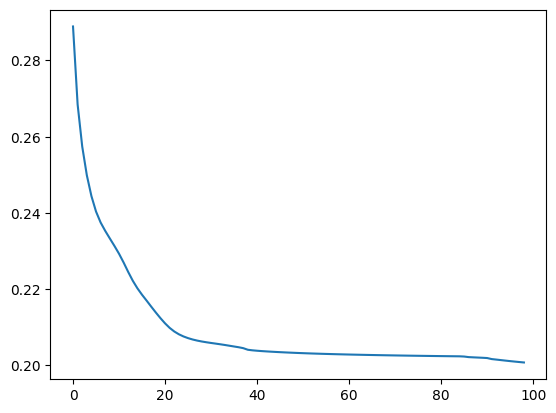

In [16]:
MSEO1 = MatrixCompletion(D,r,100, lmbda)

Question 4c)

The new stopping criterion will be defined as follows. If over the last 10 values the improvement in convergence was less than 1%, it will stop

In [17]:
def MatrixCompletionNewStop(D, r, lmbda, graph = True):
    np.random.seed(0)
    X = np.random.rand(d,r)
    Y = np.random.rand(n,r)
    O = 1*(D != 0)
    t = 1
    MSEO = []

    while t <= 10 or MSEO[-1]/MSEO[-10]<0.99:
        for k in range(0,d):
            O_Xk = O[:,k]*np.identity(n)
            X[k,:] = np.matmul(np.matmul(D[:,k, None].T,Y),np.linalg.inv(np.matmul(np.matmul(Y.T,O_Xk), Y) + lmbda*np.identity(r)))
        for i in range(0,n):
            O_Yi = O[i,:]*np.identity(d)
            Y[i,] = np.matmul(np.matmul(D[i,:],X),np.linalg.inv(np.matmul(np.matmul(X.T, O_Yi), X) + lmbda*np.identity(r)))
        MSEO.append(np.linalg.norm(D-np.multiply(O, np.matmul(Y,X.T)))**2/np.sum(O))
        t += 1
    if graph:
        plt.plot(MSEO)
        plt.show()
    return MSEO[-1], X, Y


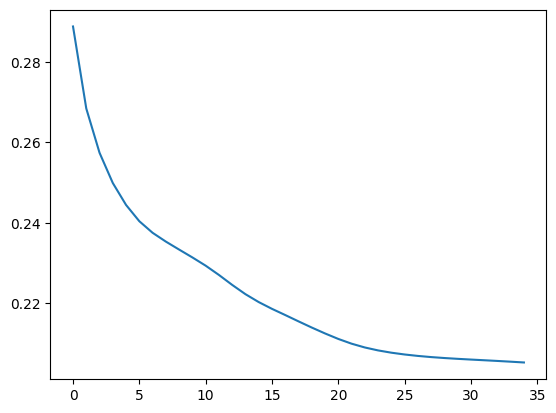

In [18]:
[MSEO2, X_approx, Y_approx] = MatrixCompletionNewStop(D,r,lmbda)

In [19]:
display(MSEO1/MSEO2)

0.9785835394769293

The time has decreased drastically, it is more than 3 times as fast, but the MSEO has decreased a little. For the new stopping criterion, it is only different by less than 3%. It now, takes approximately 34 iterations.

Question 4d)

In [20]:
new_df = df_D.copy()[:3]

lst = [1, 0.5, 0.1, 0.0001]
MSEOs = []
for lmbda in lst:
    [MSEO, X_approx, Y_approx] = MatrixCompletionNewStop(D,r,lmbda, False)
    MSEOs.append(MSEO)
    new_df.loc[:,:] = np.matmul(Y_approx, X_approx.T)[0:3,:]
    display(Latex(f"$\lambda$="+ str(lmbda)))
    display(new_df)
    display(Latex(f"MSEO: " + str(MSEO)))
# df = pd.DataFrame(np.matmul(Y_approx, X_approx.T)[0:3,:])

<IPython.core.display.Latex object>

movieId,1,47,50,110,150,260,296,318,356,480,527,589,593,780,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,,,,
1,4.091326,4.053431,4.720149,4.179459,4.037633,4.996126,4.566560,4.913247,4.247059,3.729087,4.858853,4.478432,4.503116,3.122791,4.961032,4.575976,4.629080,4.367241
4,5.703253,2.240630,4.106324,1.206687,4.585118,5.069064,1.675330,5.308433,3.969878,1.483596,6.836207,1.946934,4.478498,1.622065,4.633845,1.154587,4.821081,1.659202
5,4.082634,4.677826,4.046782,3.605515,3.205050,3.593792,4.565259,4.118492,4.218418,3.750067,3.878083,3.215294,4.662441,3.224540,3.581231,3.869916,3.688500,4.595895


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

movieId,1,47,50,110,150,260,296,318,356,480,527,589,593,780,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,,,,
1,4.072612,4.088524,4.720391,4.154726,4.059949,5.081202,4.545318,4.926065,4.232475,3.731906,4.877689,4.541681,4.497496,3.082818,5.037406,4.600374,4.653854,4.366096
4,6.220747,2.345359,3.938344,1.682896,4.851154,5.119511,1.420345,5.917311,4.480737,1.455650,7.061616,1.924086,4.577709,1.252694,4.699715,1.089304,5.012968,1.600179
5,4.295232,4.993659,4.062701,3.672005,3.155942,3.591057,4.688611,3.906471,4.279936,3.991717,3.843193,3.253756,4.861841,3.445902,3.590349,3.961676,3.348961,4.656229


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

movieId,1,47,50,110,150,260,296,318,356,480,527,589,593,780,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,,,,
1,3.695690,4.577842,4.356583,4.319892,3.721100,5.039903,3.839174,4.271522,3.902698,4.008218,4.834405,5.037985,4.338288,3.391812,5.142036,4.518440,5.440877,4.624807
4,8.659336,2.513934,1.690198,-0.590600,8.925866,5.240855,1.345067,3.801241,4.282278,4.020457,8.535592,0.867280,4.483364,4.938445,4.863442,0.949687,4.982768,1.614529
5,3.874625,3.855683,4.327669,3.264469,3.248810,4.303604,4.481346,4.161186,3.829148,3.137487,4.263460,3.343099,4.378152,2.404688,4.216600,3.860182,4.349682,4.169151


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

movieId,1,47,50,110,150,260,296,318,356,480,527,589,593,780,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,,,,
1,4.068548,4.322804,4.653943,4.050036,3.678641,4.824224,4.671209,4.690531,4.361293,3.760138,4.654604,4.234666,4.548044,3.229708,4.815724,4.576147,5.088987,4.349643
4,4.740602,2.706309,3.544554,0.225969,2.446132,5.000687,2.657451,1.958984,2.553079,1.160096,3.784848,0.841923,3.858117,-3.176393,4.820390,0.563835,5.013536,1.353083
5,4.094973,3.643540,4.325482,3.297419,3.471557,4.240679,4.765355,3.822868,3.912780,3.413111,3.992331,3.268344,4.176100,2.418921,4.203789,3.192583,-0.717048,5.487159


<IPython.core.display.Latex object>

As expected, smaller values of $\lambda$ give a more precise indication. However, for the last $\lambda$, this is not the case, due to the stopping criterion. Since $\lambda$ is so small, the change in the MSEO is small as well. A possible solution to this is to set the stopping criterion based on the value of $\lambda$. A disadvantage for smaller $\lambda$'s is that it will take longer for it to converge. A possible solution for this is to use an adaptive $\lambda$. For example, one could start with a $\lambda$ of 1 and make it decrease as it converges for its current value. Decreasing it over and over will make it converge both precise and relatively fast.